In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

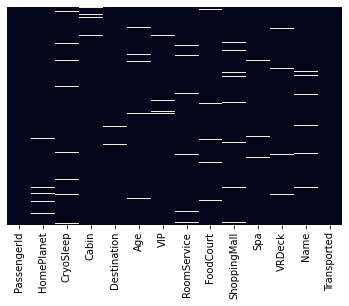

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [37]:
def cleandata(data):
    df = data.copy()
    
    df.drop(['PassengerId', 'Name','Cabin'],axis=1,inplace=True)
    
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
    df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
    
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
    df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())
    df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
    df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
    df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
    
    return df

In [11]:
train_df = cleandata(train)

In [12]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


<AxesSubplot:>

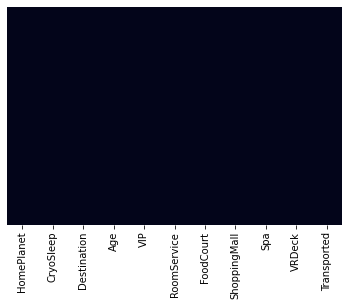

In [16]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [43]:
categories = ['HomePlanet', 'Destination']
len(categories)

2

In [44]:
def category_onehot_multcols(multcolumns, final):
    df_final=final
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final[fields],drop_first=True)
        
        final.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final,df_final],axis=1)
        
    return df_final

In [19]:
traindf = category_onehot_multcols(categories, train_df)
traindf.head()

HomePlanet
CryoSleep
Destination
VIP


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,True,PSO J318.5-22,TRAPPIST-1e,True,False
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,1,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,1,0,0


In [27]:
train["VIP"] = train["VIP"].astype(bool)

In [29]:
train["VIP"] = train["VIP"].astype(int)

In [32]:
train["CryoSleep"] = train["CryoSleep"].astype(bool)

In [33]:
train["CryoSleep"] = train["CryoSleep"].astype(int)

In [35]:
train["Transported"] = train["Transported"].astype(int)

In [36]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [38]:
train_df = cleandata(train)

In [39]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


<AxesSubplot:>

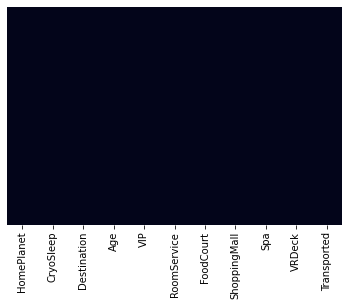

In [42]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

In [45]:
traindf = category_onehot_multcols(categories, train_df)

HomePlanet
Destination


In [46]:
traindf.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1


In [47]:
y_test = traindf['Transported']
X_test = traindf.drop(['Transported'], axis=1)

In [48]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [49]:
model.fit(X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
model.predict()